Normalised date : 
 [[0.72483221 0.66666667 0.20833333 0.81355932 0.70833333]
 [0.95302013 0.41666667 0.29166667 0.69491525 0.75      ]
 [0.57718121 0.66666667 0.45833333 0.62711864 0.58333333]
 [0.38255034 0.16666667 0.16666667 0.38983051 0.375     ]
 [0.54362416 0.33333333 0.16666667 0.45762712 0.375     ]
 [0.91946309 0.58333333 0.45833333 0.76271186 0.70833333]
 [0.51677852 0.66666667 0.41666667 0.6779661  0.66666667]
 [0.74496644 0.58333333 0.29166667 0.72881356 0.75      ]
 [0.8590604  0.58333333 0.33333333 0.77966102 0.83333333]
 [0.52348993 0.47222222 0.375      0.59322034 0.58333333]
 [0.44966443 0.41666667 0.29166667 0.52542373 0.375     ]
 [0.0738255  0.13888889 0.58333333 0.10169492 0.04166667]
 [0.20134228 0.13888889 0.45833333 0.10169492 0.04166667]
 [0.31543624 0.08333333 0.5        0.06779661 0.04166667]
 [0.76510067 0.41666667 0.33333333 0.69491525 0.95833333]
 [0.75167785 0.69444444 0.41666667 0.76271186 0.83333333]
 [0.67114094 0.55555556 0.54166667 0.84745763 1.    

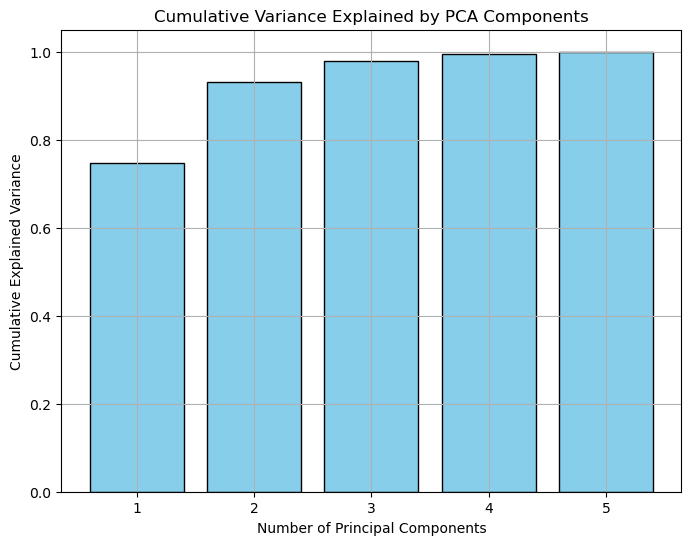

Principal Components:
 [[-0.48136016 -0.02275157 -0.67406853]
 [-0.44844975  0.38285827  0.64520569]
 [ 0.23195044  0.92007839 -0.27427786]
 [-0.51079205  0.03074857  0.13238322]
 [-0.5024696   0.07356757 -0.19127876]]
Transformed Data:
 [[-2.12544403e+00 -7.05853204e-01  5.02288628e-01]
 [-1.76976265e+00 -7.17979033e-01 -9.35384958e-01]
 [-1.04113512e+00  5.34909244e-01  4.56592033e-01]
 [ 6.20569644e-01 -1.84807763e+00 -3.45361014e-02]
 [-8.84455695e-02 -1.57535323e+00  9.10303531e-02]
 [-1.87563389e+00  4.11946362e-01 -5.87093894e-01]
 [-1.21402007e+00  3.51319216e-01  6.32454590e-01]
 [-1.80926166e+00 -4.19852690e-01  3.13264192e-02]
 [-2.16383495e+00 -1.91286335e-01 -3.24498033e-01]
 [-6.21091878e-01 -2.14932925e-01  1.45764259e-01]
 [-5.09878427e-02 -7.83105989e-01  3.83213168e-01]
 [ 2.74530029e+00  1.51688686e-01  4.19008129e-02]
 [ 2.37305934e+00 -4.97021217e-01 -6.34716012e-02]
 [ 2.40451654e+00 -3.89322093e-01 -5.62996803e-01]
 [-1.73512454e+00 -4.41997205e-01 -6.88709433e-0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def standardize_data(X):
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_standardized = (X - mean) / std_dev
    return X_standardized
def normalize_data(X):
    max=np.max(X,axis=0)
    min=np.min(X,axis=0)
    denominator=max-min
    X_nomalized=(X-min)/denominator
    return X_nomalized


def compute_covariance_matrix(X):
    covariance_matrix = np.cov(X.T)
    return covariance_matrix

def compute_eigenvalues_and_eigenvectors(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

def calculate_variance_ratio(sorted_eigenvalues):
     return sorted_eigenvalues/np.sum(sorted_eigenvalues)

def select_principal_components(eigenvectors, num_components):
    W = eigenvectors[:, :num_components]
    return W

def transform_data(X, W):
    X_new = np.dot(X, W)
    return X_new

def plot_vriance(cumulative_variance):
    # Plotting the cumulative explained variance as a bar graph
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, color='skyblue', edgecolor='black')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Variance Explained by PCA Components')
    plt.xticks(range(1, len(cumulative_variance) + 1))
    plt.grid(True)
    plt.show()


def importdata(path):
    dataSet = pd.read_csv(path)
    dataSet = dataSet.sample(frac = 1)
    # Separating the target variable
    X = dataSet.values[:, 0:len(dataSet.columns)-1]
    y = dataSet.values[:, -1:]
    return X.astype(float), y


X, y = importdata("./Iris.csv")
X_standardized = standardize_data(X)
X_normalised=normalize_data(X)

print("Normalised date : \n",X_normalised)
print("Standardized Data:\n", X_standardized)

covariance_matrix = compute_covariance_matrix(X_standardized)
print("Covariance Matrix:\n", covariance_matrix)

eigenvalues, eigenvectors = compute_eigenvalues_and_eigenvectors(covariance_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

sorted_eigenvalues, sorted_eigenvectors = sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors)
print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)


explained_variance_ratio = calculate_variance_ratio(sorted_eigenvalues)
print("Explained Variance Ratio = ", explained_variance_ratio)

cumulative_variance = np.cumsum(explained_variance_ratio)
plot_vriance(cumulative_variance)

# Select the top 2 principal components
W = select_principal_components(sorted_eigenvectors, 3)
print("Principal Components:\n", W)

X_pca = transform_data(X_standardized, W)
print("Transformed Data:\n", X_pca)


